# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK

?bayesian_exploration


        Bayesian exploration algorithm

        Parameters
        ----------
        config : dict
            Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

        evaluate_f : callable
            Returns dict of outputs after problem has been evaluated


        Optional kwargs arguments
        --------
        n_steps : int, default: 30
            Number of optimization steps to take

        executor : futures.Executor, default: None
            Executor object to evaluate problem using multiple threads or processors

        n_initial_samples : int, defualt: 5
            Number of initial sobel_random samples to take to start optimization. Ignored if initial_x is not None.

        custom_model : callable, optional
            Function in the form f(train_x, train_y) that returns a botorch model instance

        output_path : str, optional
            Location to save optimization data and models.

        verbose : bool, def

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               use_gpu=False,                         ## Use GPU
                               n_steps=5,                             ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               # batch_size = 5,                      ## Specify batched exploration
                               # custom_model = myCustomModel,        ## Specify custom model creation function
                               # sigma=torch.eye(2) * 0.01,           ## Specify proximal term (requires batch_size = 1)
                               verbose=True)

No executor given. Running in serial mode.
tensor([[0.6245, 0.8146]], dtype=torch.float64)
tensor([[0., 0.]], dtype=torch.float64)
tensor([[1.3845, 0.0000]], dtype=torch.float64)
tensor([[0.0000, 1.0527]], dtype=torch.float64)
tensor([[0.9647, 0.7378]], dtype=torch.float64)


['inputs', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model']


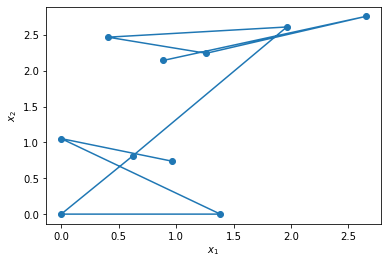

In [3]:
# plot exploration results and path

fig, ax = plt.subplots()
print(list(results.keys()))
ax.plot(results['variables'][:, 0], results['variables'][:, 1], '-o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()